In [49]:
# Importing libraries 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import PIL 
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 


In [50]:
import pathlib

# URL for the flower dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Download and extract the dataset
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

# Convert the dataset directory path to a pathlib Path object
data_dir = pathlib.Path(data_dir)


In [51]:
image_count = len(list(data_dir.glob('*/*.jpg'))) 
print(image_count) 


3670


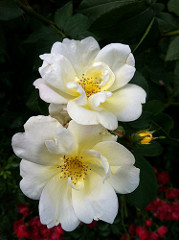

In [52]:
roses = list(data_dir.glob('roses/*')) 
PIL.Image.open(str(roses[0]))


In [53]:
# Training split 
train_ds = tf.keras.utils.image_dataset_from_directory( 
	data_dir, 
	validation_split=0.2, 
	subset="training", 
	seed=123, 
	image_size=(180, 180), 
	batch_size=32) 


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [54]:
# Testing or Validation split 
val_ds = tf.keras.utils.image_dataset_from_directory( 
	data_dir, 
	validation_split=0.2, 
	subset="validation", 
	seed=123, 
	image_size=(180,180), 
	batch_size=32) 


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [55]:
class_names = train_ds.class_names 
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


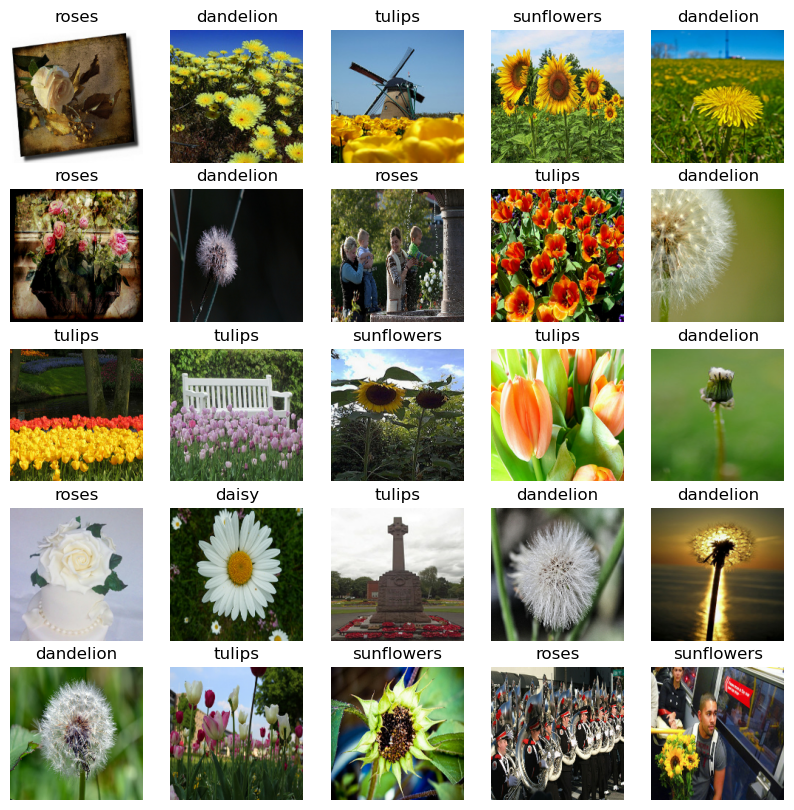

In [56]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10)) 

for images, labels in train_ds.take(1): 
	for i in range(25): 
		ax = plt.subplot(5, 5, i + 1) 
		plt.imshow(images[i].numpy().astype("uint8")) 
		plt.title(class_names[labels[i]]) 
		plt.axis("off") 


In [57]:
num_classes = len(class_names) 

model = Sequential([ 
	layers.Rescaling(1./255, input_shape=(180,180, 3)), 
	layers.Conv2D(16, 3, padding='same', activation='relu'), 
	layers.MaxPooling2D(), 
	layers.Conv2D(32, 3, padding='same', activation='relu'), 
	layers.MaxPooling2D(), 
	layers.Conv2D(64, 3, padding='same', activation='relu'), 
	layers.MaxPooling2D(), 
	layers.Flatten(), 
	layers.Dense(128, activation='relu'), 
	layers.Dense(num_classes) 
]) 


In [58]:
model.compile(optimizer='adam', 
			loss=tf.keras.losses.SparseCategoricalCrossentropy( 
				from_logits=True), 
			metrics=['accuracy']) 
model.summary() 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

In [59]:
epochs=5
history = model.fit( 
train_ds, 
validation_data=val_ds, 
epochs=epochs 
) 


Epoch 1/5
38/92 [===========>..................] - ETA: 1:01 - loss: 1.8426 - accuracy: 0.2327

KeyboardInterrupt: 

In [ ]:
#Accuracy 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 

#loss 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

#epochs 
epochs_range = range(epochs) 

#Plotting graphs 
plt.figure(figsize=(8, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 

plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show() 


In [60]:
# Save the model
model.save("flower_model.h5")

C:\Users\Ishan-world\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#import tensorflow as tf

# Load the original model (with custom_objects if necessary)
#model = tf.keras.models.load_model('flower_model.h5', custom_objects={'SparseCategoricalCrossentropy': tf.keras.losses.SparseCategoricalCrossentropy})

# Re-compile the model without the 'fn' argument
#model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Save the model again
#model.save('flower_model.h5')


In [61]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [62]:
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       